## Hand Written Digit Recognition using CNN

#### Importing Libraries

In [37]:
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
import matplotlib.pyplot as plt


#### Loading Dataset 

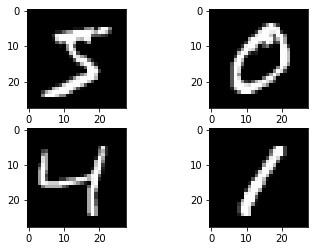

In [38]:
(X_train,y_train),(X_test,y_test)=tf.keras.datasets.mnist.load_data()
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

#### Reshaping and Normalising the Image

In [39]:
X_train=X_train.reshape((X_train.shape[0],28,28,1)).astype("float32")
X_test=X_test.reshape((X_test.shape[0],28,28,1)).astype("float32")
# Normalising data between 0-255 to 0-1
X_train=X_train/255
X_test=X_test/255



#### One hot encoding of outputs

In [40]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

num_classes=y_test.shape[1]
def cnn_model():
    # create model
    model = Sequential()
    model.add(tf.keras.layers.Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
    model.add(tf.keras.layers.Conv2D(16, (3, 3),  activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
    model.add(tf.keras.layers.Dropout(0.2))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(128, activation='relu'))
    model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
# build the model
model = cnn_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=64)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))


Epoch 1/10
938/938 [==============================] - 20s 20ms/step - loss: 0.4725 - accuracy: 0.8532 - val_loss: 0.0466 - val_accuracy: 0.9844
Epoch 2/10
938/938 [==============================] - 18s 19ms/step - loss: 0.0761 - accuracy: 0.9769 - val_loss: 0.0402 - val_accuracy: 0.9869
Epoch 3/10
938/938 [==============================] - 18s 20ms/step - loss: 0.0533 - accuracy: 0.9845 - val_loss: 0.0317 - val_accuracy: 0.9894
Epoch 4/10
938/938 [==============================] - 18s 20ms/step - loss: 0.0428 - accuracy: 0.9860 - val_loss: 0.0300 - val_accuracy: 0.9902
Epoch 5/10
938/938 [==============================] - 18s 20ms/step - loss: 0.0344 - accuracy: 0.9888 - val_loss: 0.0246 - val_accuracy: 0.9922
Epoch 6/10
938/938 [==============================] - 19s 20ms/step - loss: 0.0295 - accuracy: 0.9905 - val_loss: 0.0242 - val_accuracy: 0.9925
Epoch 7/10
938/938 [==============================] - 19s 20ms/step - loss: 0.0285 - accuracy: 0.9911 - val_loss: 0.0212 - val_accuracy:

### Sample Image Testing

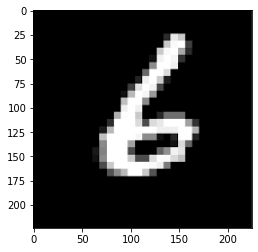

In [41]:
image=plt.imread("sampleimage1.png")
plt.imshow(image)


In [44]:
from keras.preprocessing import image

def load(filename):
    img = image.load_img(filename, grayscale=True, target_size=(28, 28))
    img = image.img_to_array(img)
    img = img.reshape(1, 28, 28, 1).astype('float32')
    img = img / 255.0
    return img


def sample():
    img = load_image('sampleimage1.png')
    digit = model.predict_classes(img)
    print("The digit is "+str(digit[0]))


sample()


The digit is 6
